An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [86]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [87]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [89]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Univariate Analysis

### AGE

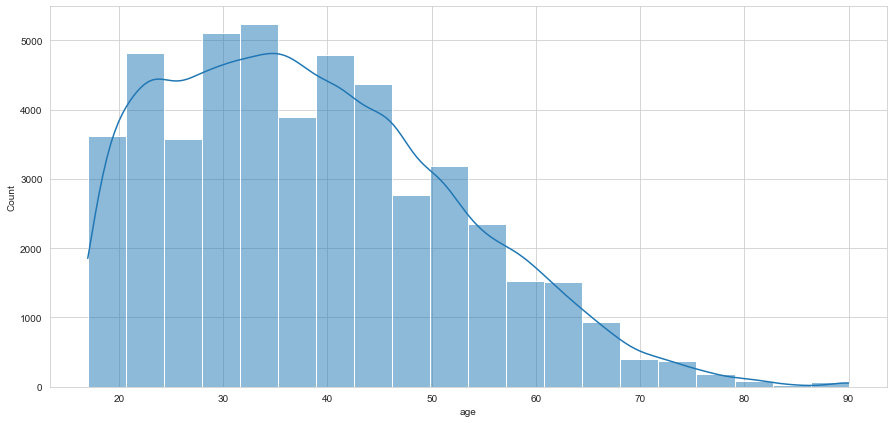

In [90]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(df['age'],kde=True,bins=20,ax=ax)
plt.show()


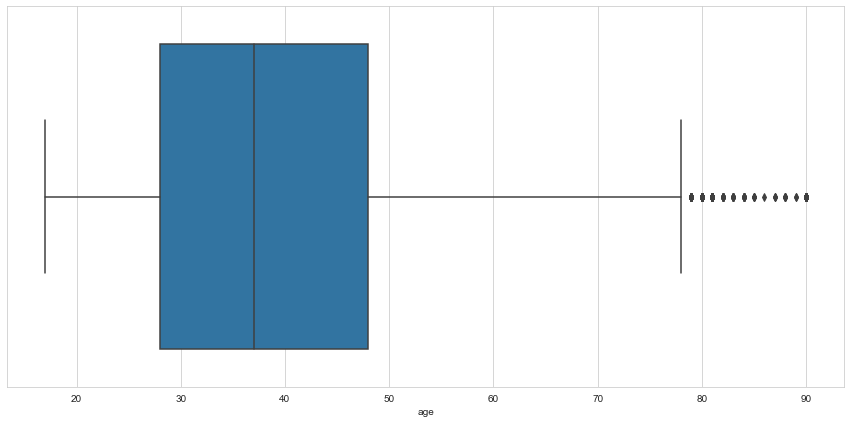

In [91]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(x='age',data=df)
plt.show()

### Capital Gain

<AxesSubplot:xlabel='capital-gain'>

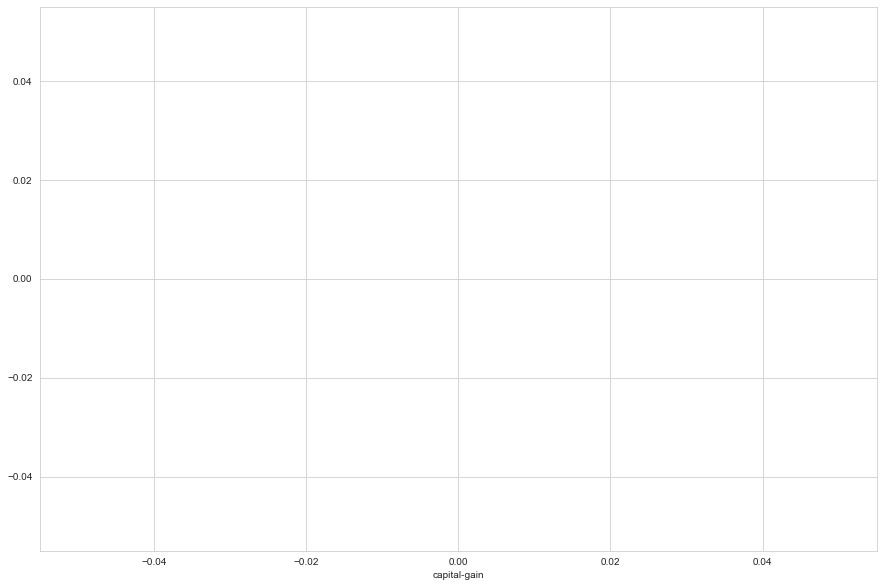

In [92]:
fig,ax=plt.subplots(figsize=(15,10))
sns.scatterplot(x='capital-gain',data=df,ax=ax)

### Function for Categorical Univariate Plot

In [93]:
def draw_catplot(col_name,dataframe):
    print('Number of Categories : ', dataframe[col_name].nunique())
    print('Different Categories in column ' , col_name , ' are :')
    for i in dataframe[col_name].unique():
        print(i)
    if(df[col_name].nunique()>=15):
        fig,ax=plt.subplots(figsize=(22,7))
    else: 
        fig,ax=plt.subplots(figsize=(17,7))
    sns.countplot(x=col_name,data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.show()

### Workclass

Number of Categories :  9
Different Categories in column  workclass  are :
Private
Local-gov
?
Self-emp-not-inc
Federal-gov
State-gov
Self-emp-inc
Without-pay
Never-worked


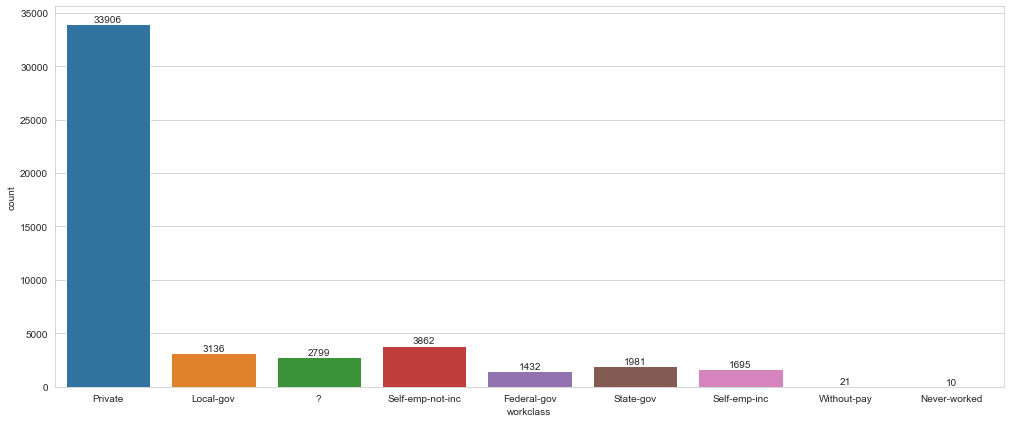

In [94]:
draw_catplot('workclass',df)

There are 9 different categories in workclass and majority of the people are from Private workclass.

### Education

Number of Categories :  16
Different Categories in column  education  are :
11th
HS-grad
Assoc-acdm
Some-college
10th
Prof-school
7th-8th
Bachelors
Masters
Doctorate
5th-6th
Assoc-voc
9th
12th
1st-4th
Preschool


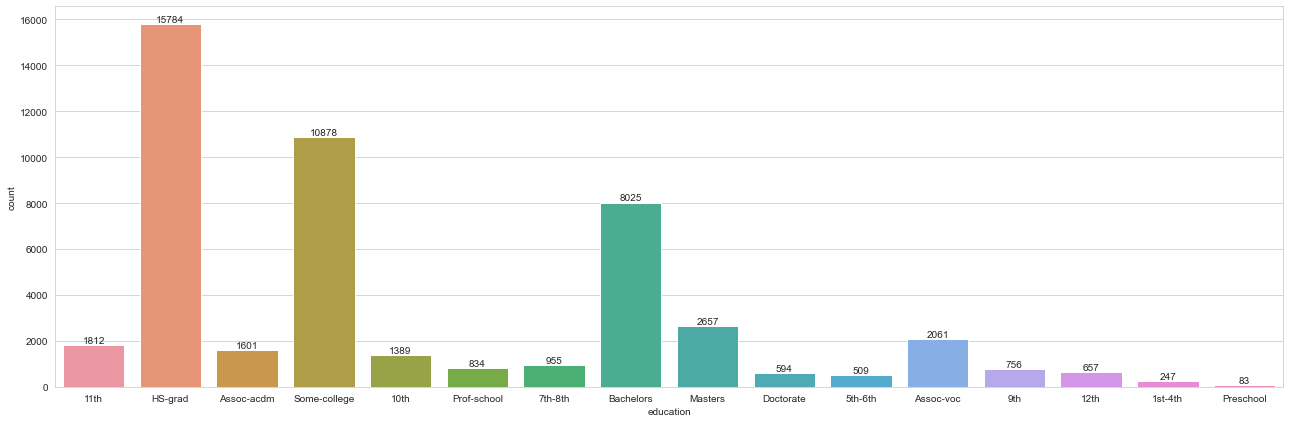

In [95]:
draw_catplot('education',df)

HS-Grad sector is opted by majority of the people among different sectors in education.

### Educational- Num

Number of Categories :  16
Different Categories in column  educational-num  are :
7
9
12
10
6
15
4
13
14
16
3
11
5
8
2
1


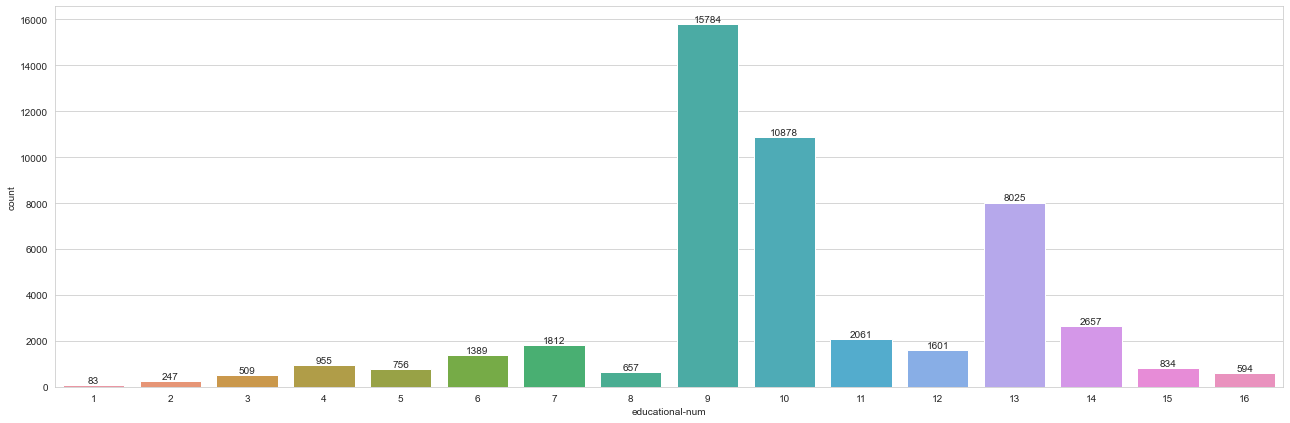

In [96]:
draw_catplot('educational-num',df)

### Marital - Status

Number of Categories :  7
Different Categories in column  marital-status  are :
Never-married
Married-civ-spouse
Widowed
Divorced
Separated
Married-spouse-absent
Married-AF-spouse


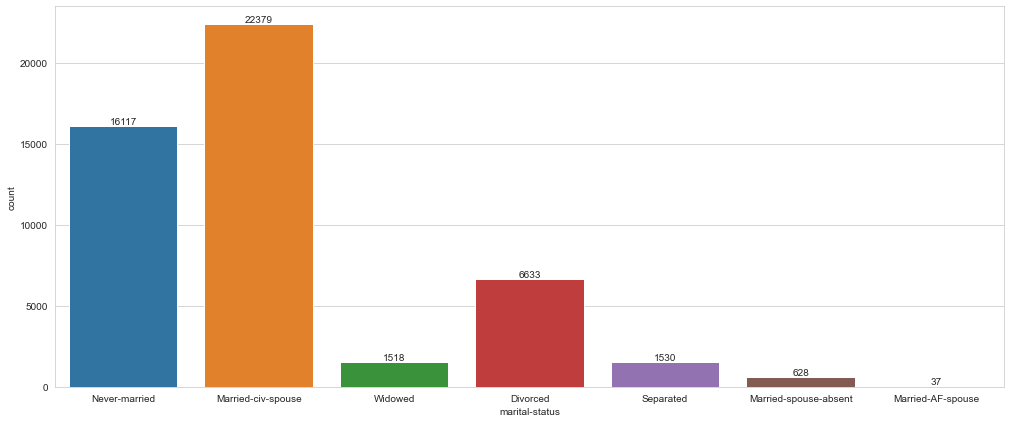

In [97]:
draw_catplot('marital-status',df)

Marital Status is divided into 7 different categories and most of the people come under Married-civ-spouse followed by Never-married.

### Occupation

Number of Categories :  15
Different Categories in column  occupation  are :
Machine-op-inspct
Farming-fishing
Protective-serv
?
Other-service
Prof-specialty
Craft-repair
Adm-clerical
Exec-managerial
Tech-support
Sales
Priv-house-serv
Transport-moving
Handlers-cleaners
Armed-Forces


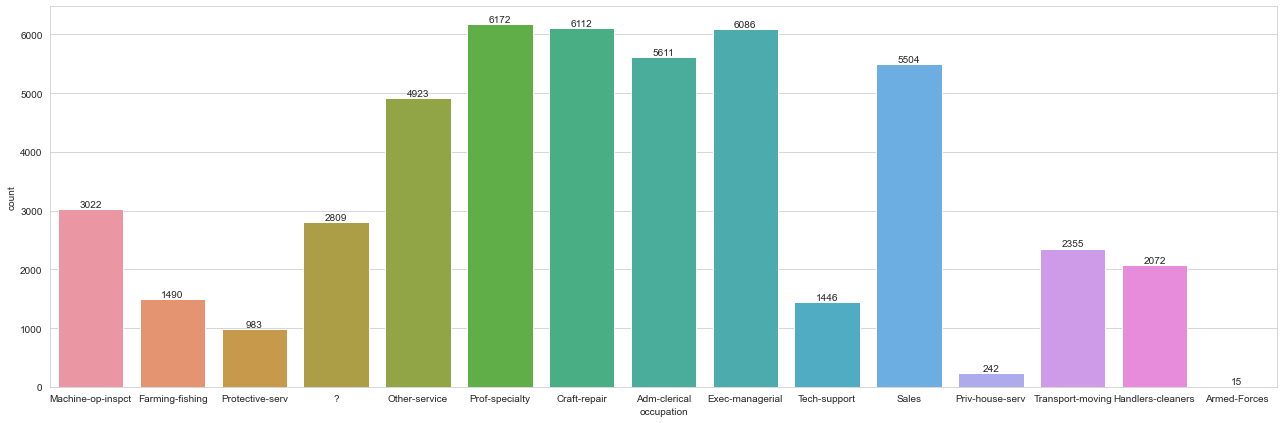

In [98]:
draw_catplot('occupation',df)

### Relationship

Number of Categories :  6
Different Categories in column  relationship  are :
Own-child
Husband
Not-in-family
Unmarried
Wife
Other-relative


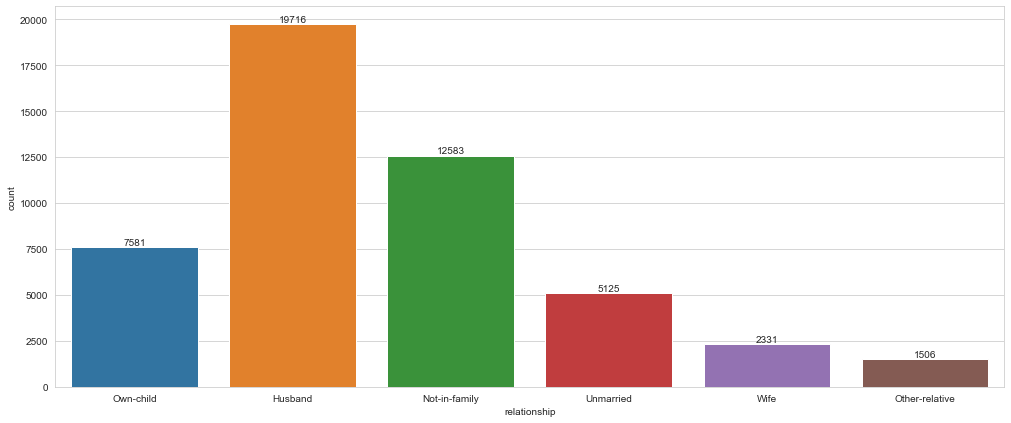

In [99]:
draw_catplot('relationship',df)

### Gender

Number of Categories :  2
Different Categories in column  gender  are :
Male
Female


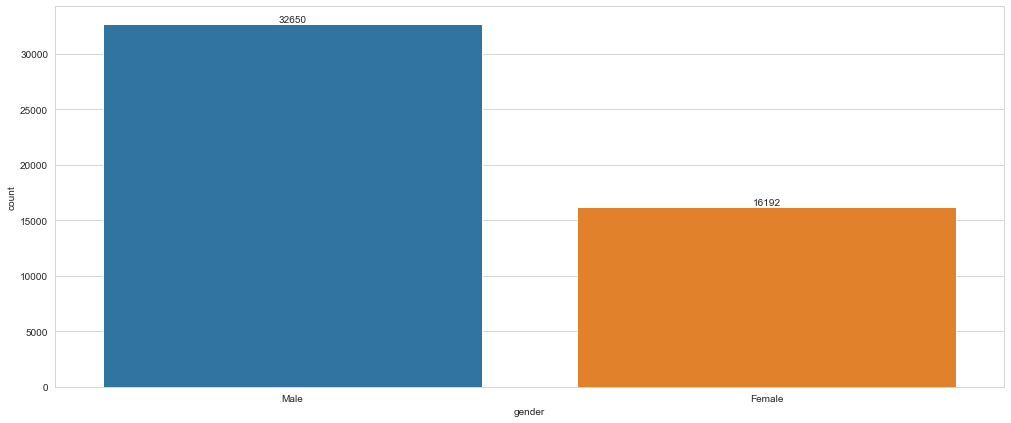

In [100]:
draw_catplot('gender',df)

Majority of the people are MALE.

### Race

Number of Categories :  5
Different Categories in column  race  are :
Black
White
Asian-Pac-Islander
Other
Amer-Indian-Eskimo


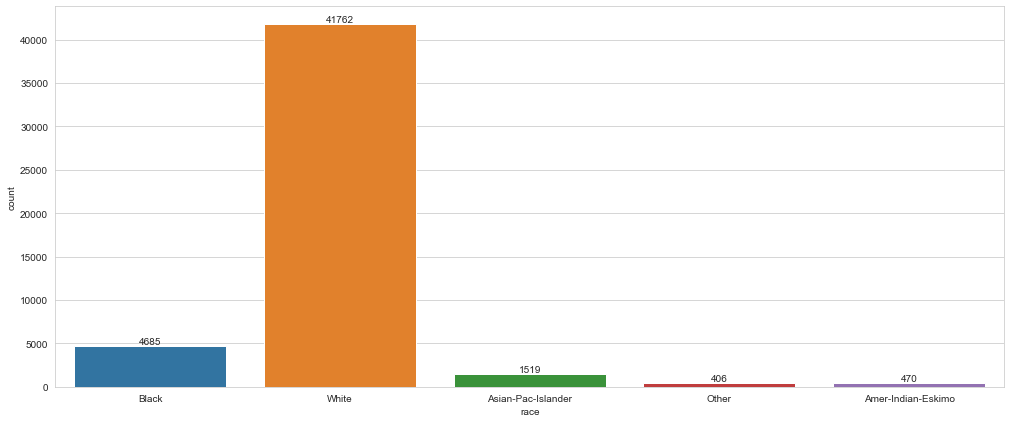

In [101]:
draw_catplot('race',df)

### Native-Country

Number of Categories :  42
Different Categories in column  native-country  are :
United-States
?
Peru
Guatemala
Mexico
Dominican-Republic
Ireland
Germany
Philippines
Thailand
Haiti
El-Salvador
Puerto-Rico
Vietnam
South
Columbia
Japan
India
Cambodia
Poland
Laos
England
Cuba
Taiwan
Italy
Canada
Portugal
China
Nicaragua
Honduras
Iran
Scotland
Jamaica
Ecuador
Yugoslavia
Hungary
Hong
Greece
Trinadad&Tobago
Outlying-US(Guam-USVI-etc)
France
Holand-Netherlands


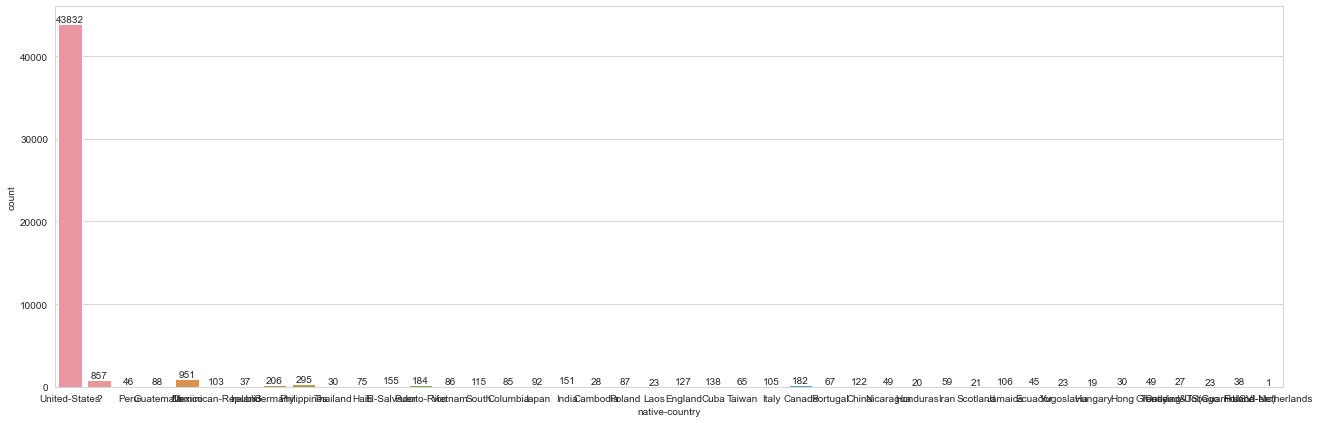

In [102]:
draw_catplot('native-country',df)

Most of the people belong to United States

### Income

Number of Categories :  2
Different Categories in column  income  are :
<=50K
>50K


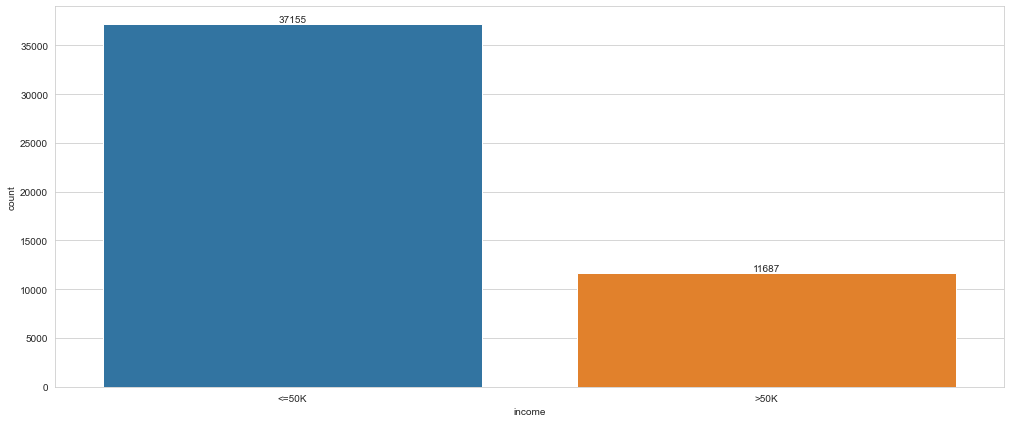

In [103]:
draw_catplot('income',df)

Most of the people have income less than or equal to 50K.

# Bivariate Analysis

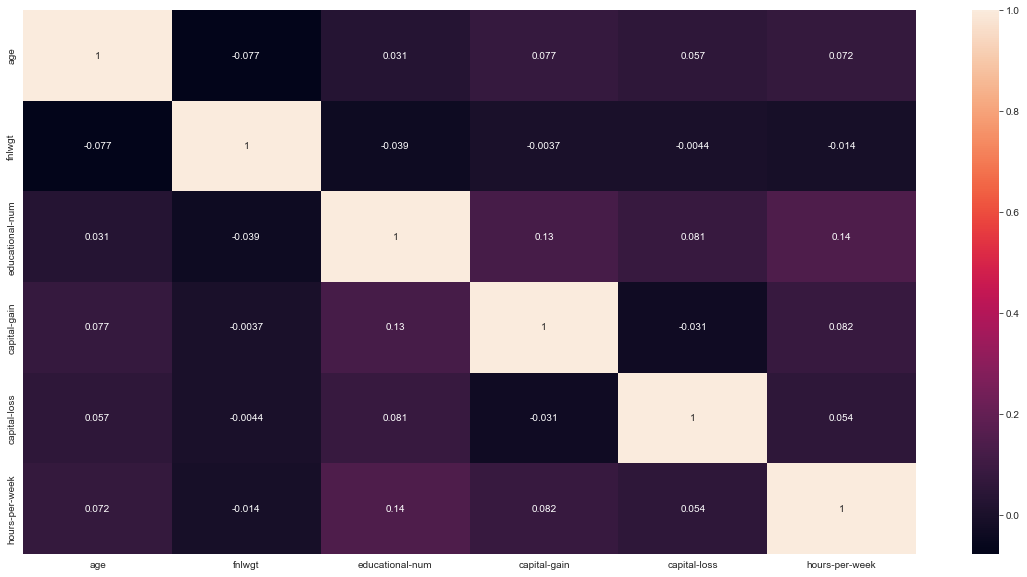

In [104]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

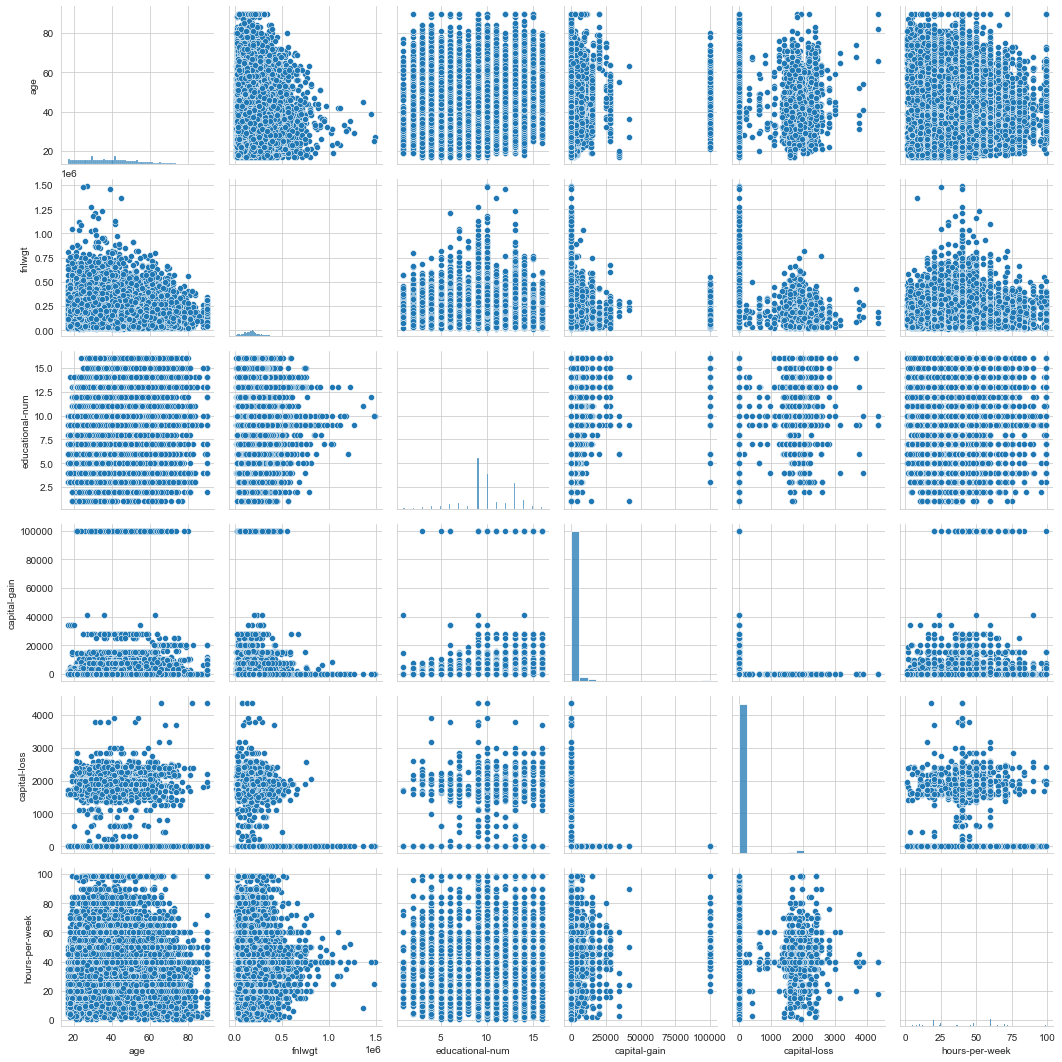

In [105]:
sns.pairplot(df)

### Relationship of Age with Income

<AxesSubplot:xlabel='age'>

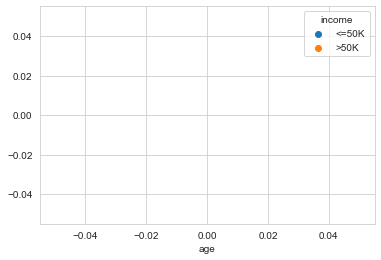

In [106]:
sns.scatterplot(x='age',data=df,hue='income')

<AxesSubplot:xlabel='age', ylabel='Count'>

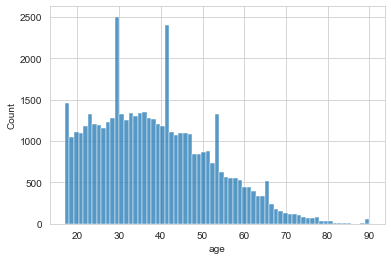

In [107]:
sns.histplot(df['age'])

In [108]:
num_col=[col for col in df.columns if df[col].dtype!='object' ]
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

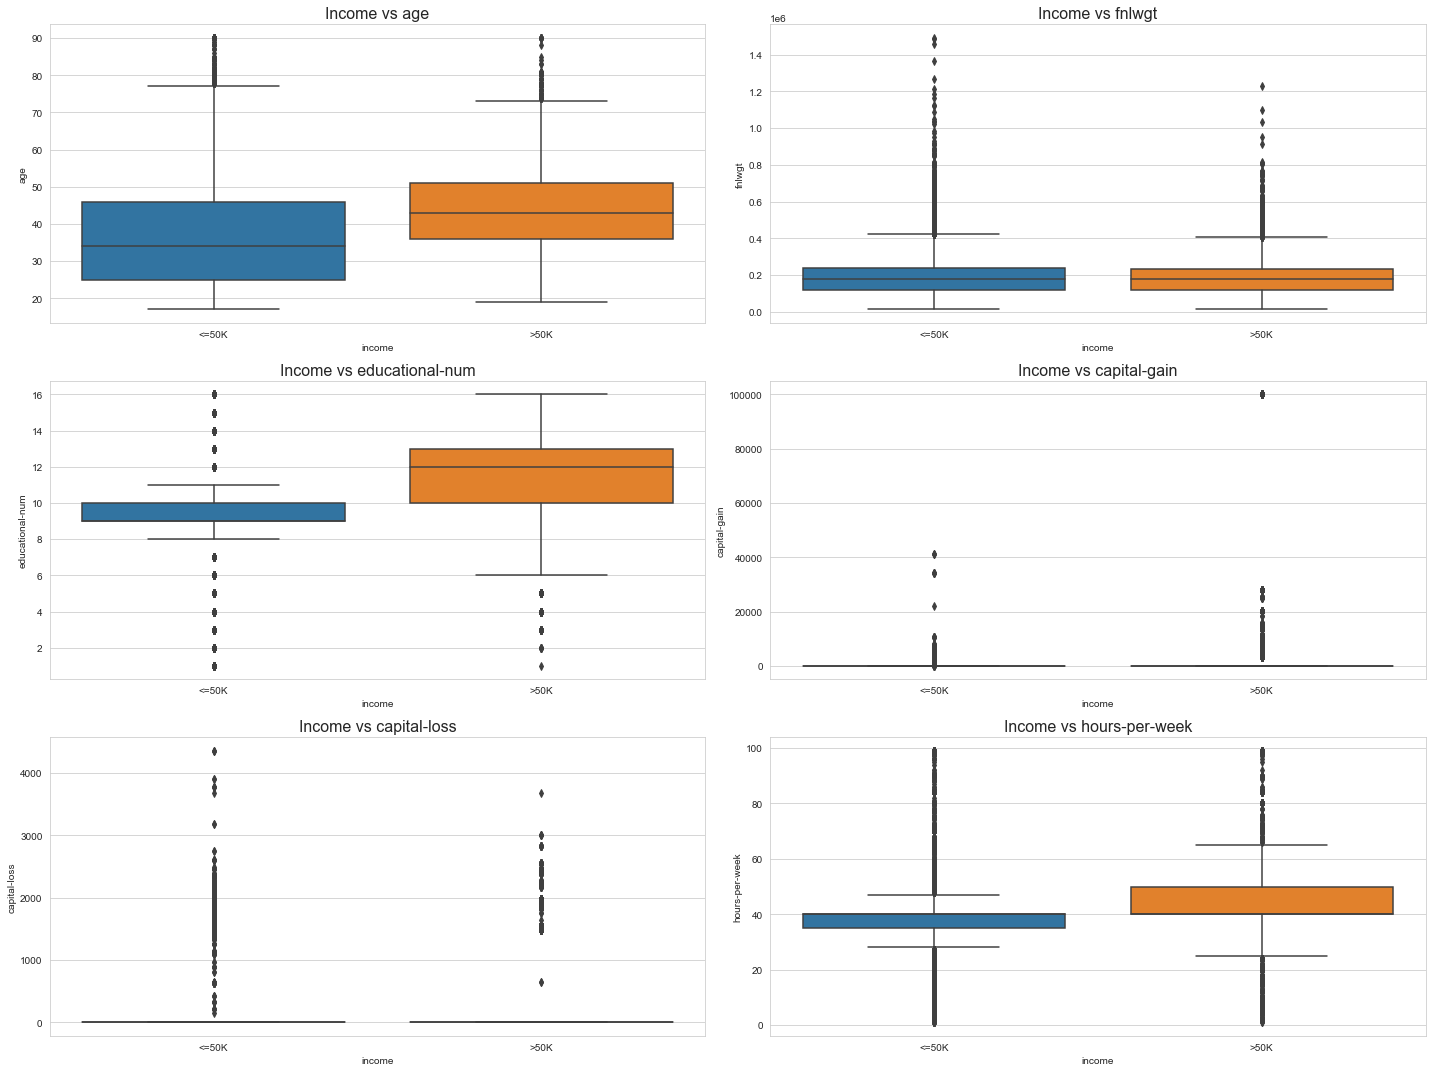

In [109]:
rows=3
cols=2
fig , ax = plt.subplots(nrows = rows , ncols = cols , figsize = (20,15))


count = 0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(data = df , x = 'income' , y = num_col[count] , ax = ax[i,j])
        plt.tight_layout()
        ax[i,j].set_title(f"Income vs {num_col[count]}", fontsize=16)
        count += 1

### Observations 

Income vs Age
1. People having income >=50K have their age between 35 and 51. Whereas people having age <=50K have age in range 25-45.

Income vs Final Weight
1. Number of Outliers for Income <=50k are higher than those for Income>50k.

Income vs education-num
1. People having Income>50k have an Educational Experience from 10 - 13 yrs.
2. People having Income<=50k have an Educational Experience from 9 - 10 yrs.
3. Median Value for Employees with Income>50k is 12 Years.

Income vs Capital Gain
1. Cant make any conclusion as only outliers are present.

Income vs capital-loss
1. Cant make any conclusion as only outliers are present.

Income vs hours-per-week
1. People having income >50K spend around 40-50 hours per week.
2. People having income <=50K spend around 35-40 hours per week.

In [110]:
#1) Income vs Age :
#     Age Median Value for Income >50k is higher than those with Income <=50k.
#     Age Range for Income >50k lies between around 35 and 51. And Range for Income <=50k lies between 25 and 48.
# 
# 2) Income vs Final Weight :
#     For both categories in Income, Median Values for Final Weight are almost Same.
#     Number of Outliers for Income <=50k are higher than those for Income>50k.
#     
# 3) Income vs education-num :
#     People having Income>50k have an Educational Experience from 10 - 13 yrs.
#     People having Income<=50k have an Educational Experience from 9 - 10 yrs.
#     Median Value for Employees with Income>50k is 12 Years.
#     
# 4) Income vs capital-gain :
#     No inferences can be made from Capital Gain. Just Outliers are present.
# 
# 5) Income vs capital-loss :
#     No inferences can be made from Capital Gain. Just Outliers are present.
# 
# 6) Income vs hours-per-week :
#     Employees who devote more than 40 hrs per week have a Income more than 50k. And for those with less than 40 hrs per week, they have Income less than 50k.
#     Number of Outliers for Income<=50k is greater than Income>50k.

In [111]:
cat_col=[i for i in df.columns if (df[i].dtype=='object' and i!='income')]
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

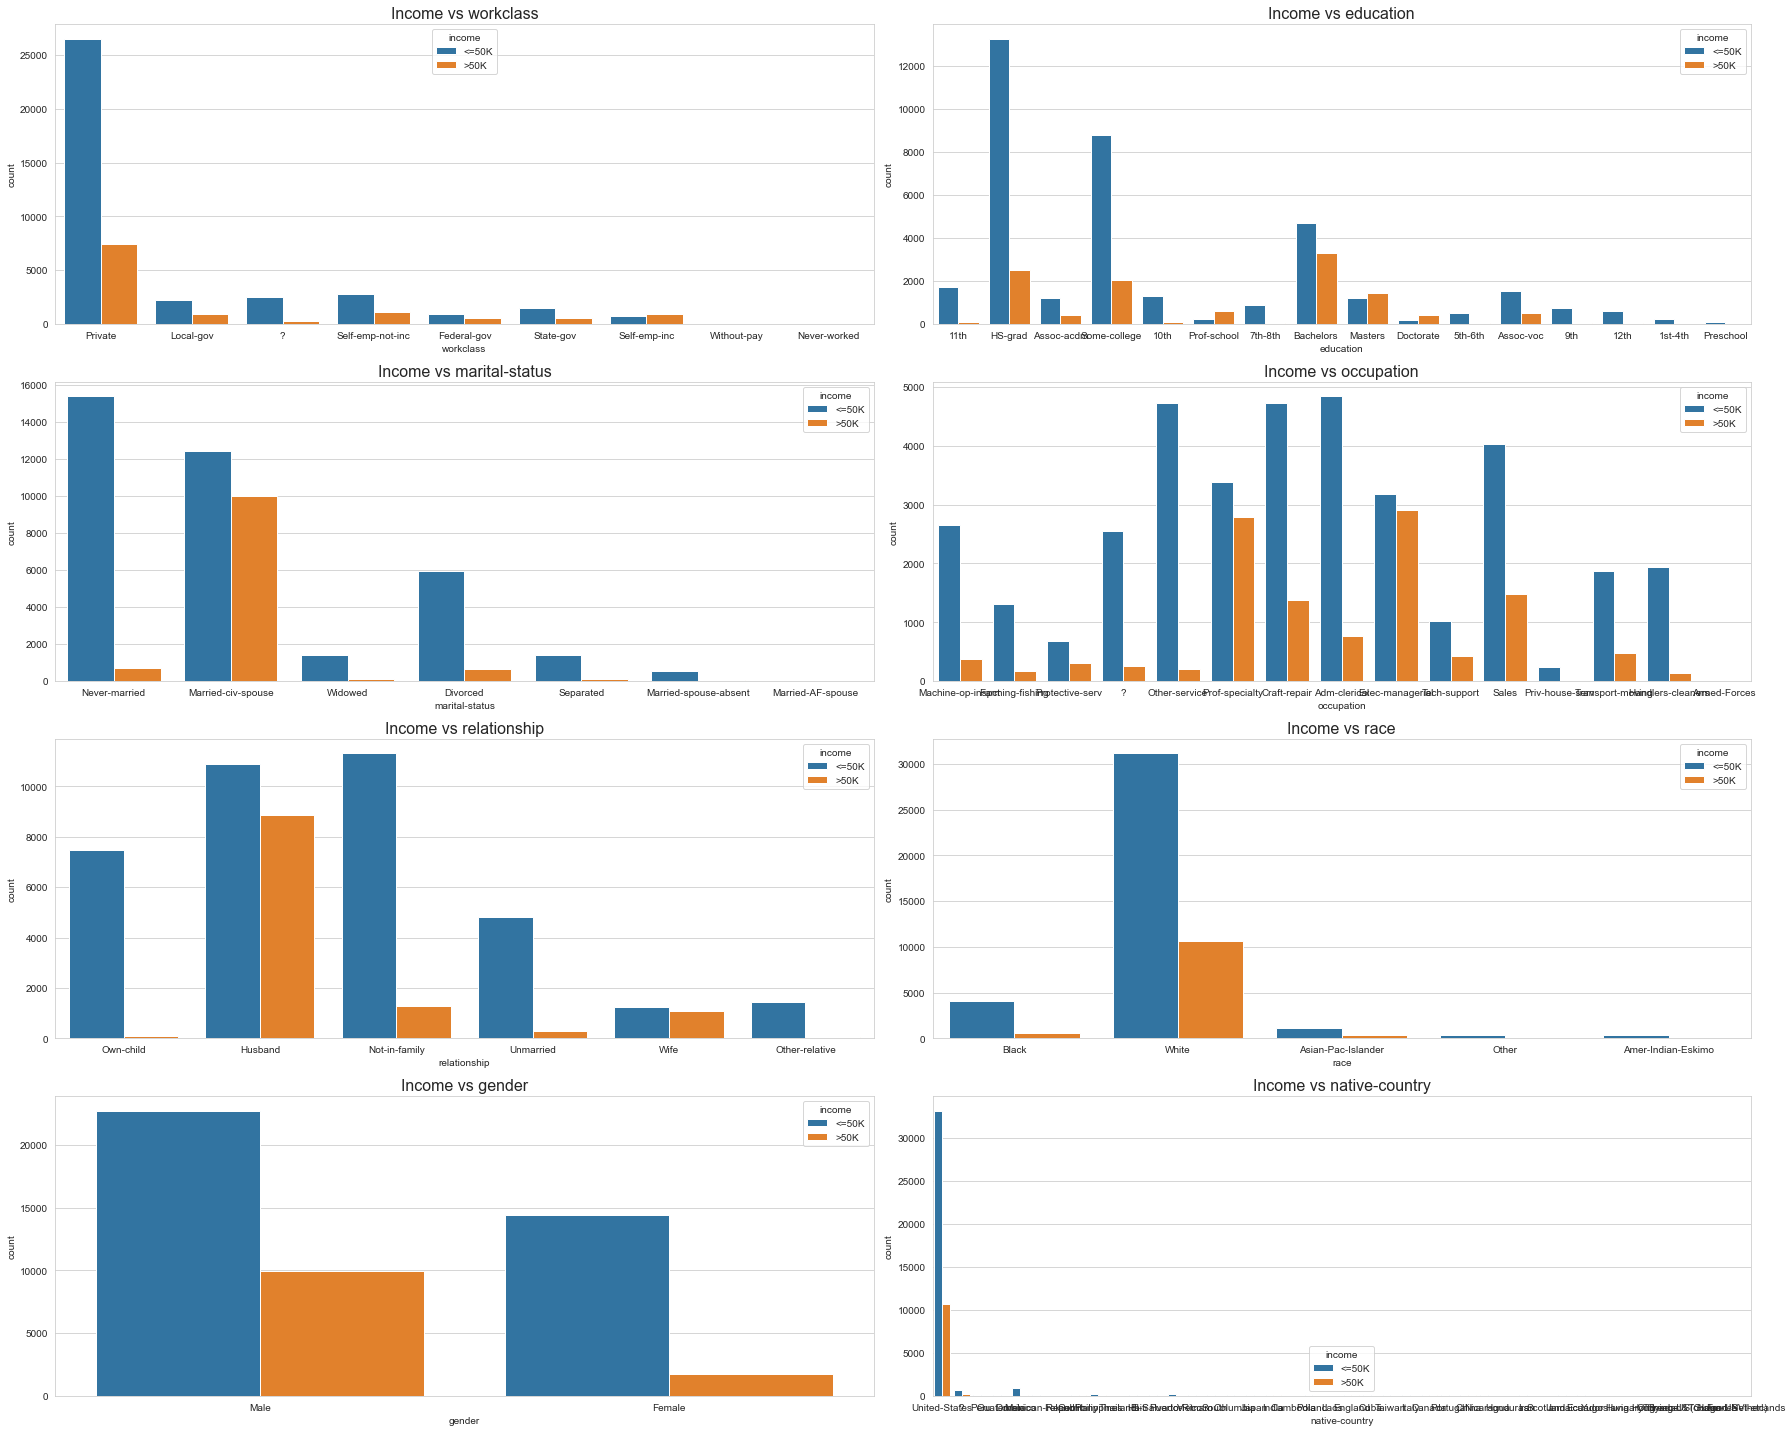

In [112]:
rows=4
cols=2
fig,axes= plt.subplots(nrows=rows, ncols=cols, figsize=(25,20))

count = 0
for i in range(rows):
    for j in range(cols):
        sns.countplot(x = cat_col[count] , hue='income',data=df,  ax = axes[i,j])
        plt.tight_layout()
        axes[i,j].set_title(f"Income vs {cat_col[count]}", fontsize=16)
        count += 1

### Observations

Income vs Workclass
1. Majority of the people in workclass are from Private sector .
2. Majority of the people in Private Sector have income <=50K .

Income vs Education
1. Majority of population having income <=50K have HS-Grad qualification.
2. Majority of population having income >50K are Bachelors.

Income vs Marital Status
1.  Majority of people having income <=50K are unmarried.
2.  Majority of population having income >50K are married-civ-spouse.


Income vs Workclass


Income vs Relationship
1.  Majority of people having income <=50K are not in family.
2.  Majority of population having income >50K are Husband.



Income vs Gender
1. Males are in majority in both the classes of income i.e. >=50K and <50K .


# Treating Missing Values

In [113]:
from numpy import nan 
df1=df.replace('?',nan)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [114]:
for i in df.columns:
    print(i , df1[i].isnull().sum())


age 0
workclass 2799
fnlwgt 0
education 0
educational-num 0
marital-status 0
occupation 2809
relationship 0
race 0
gender 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 857
income 0


We can see missing values in 3 columns

In [115]:
col_nan= [i for i in df1.columns if df1[i].isnull().sum()>0]
col_nan

['workclass', 'occupation', 'native-country']

In [116]:
for i in  col_nan:
    print( i , " : " , df1[i].value_counts())

workclass  :  Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
occupation  :  Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
native-country  :  United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                           

Since null values are big in number , so we just cant delete them. SO instead of removing them , lets make their different category.

In [117]:
df1['workclass'][df1['workclass'].isnull()]

4        NaN
6        NaN
13       NaN
22       NaN
35       NaN
        ... 
48811    NaN
48812    NaN
48820    NaN
48822    NaN
48823    NaN
Name: workclass, Length: 2799, dtype: object

In [69]:
df1[df1['workclass']==df1['workclass'].isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [82]:
for i in col_nan:
    df[i].fillna('Unknown', inplace=True)


In [83]:
df1['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [84]:
df1['occupation'].isnull().sum()

2809

# Treating Outliers

In [169]:
num_col=[i for i in df.columns if df[i].dtype!='object']
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [170]:
# Function to plot Individual Outliers

def plot_outliers(col_name,dataframe):
    
    plt.title('Outliers in : ' + str(col_name))
    sns.boxplot(x=col_name, data=dataframe)
    plt.show()

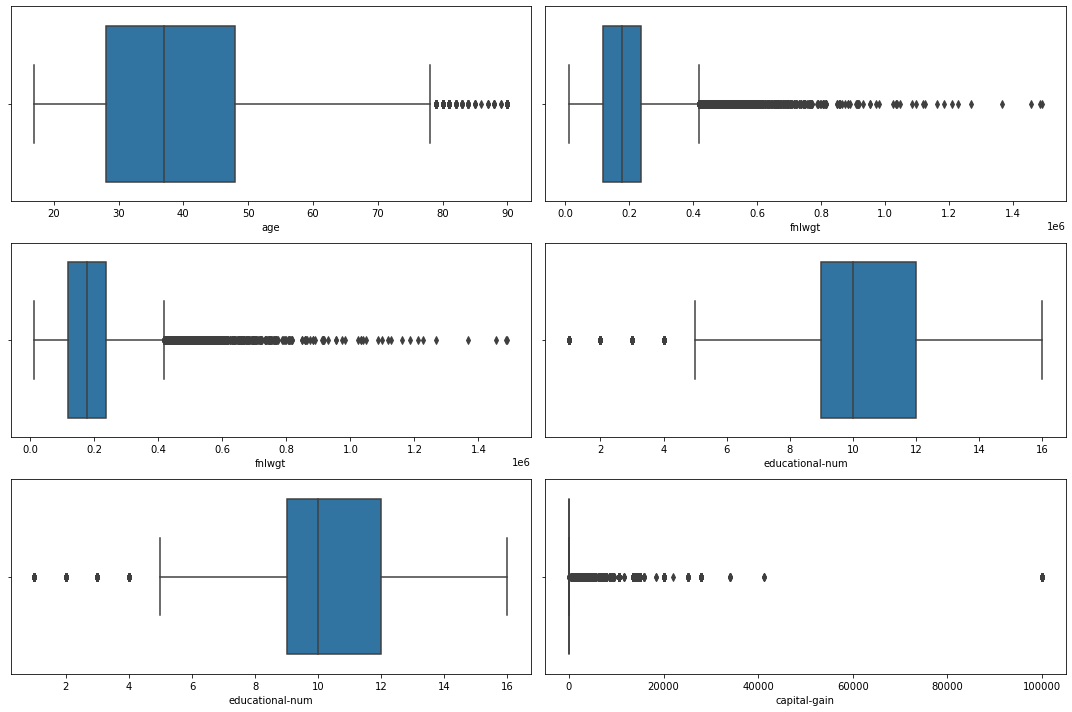

In [171]:

fig,ax=plt.subplots(3,2,figsize=(15,10))
i=0
while i<3:
    
    sns.boxplot(x=num_col[i], data=df,ax=ax[i][0])
    sns.boxplot(x=num_col[i+1], data=df,ax=ax[i][1])
    
    plt.tight_layout()
    i=i+1


In [172]:
df1=df.copy()

In [173]:
df1['age'][df1['age']<50]

0        25
1        38
2        28
3        44
4        18
         ..
48834    32
48836    22
48837    27
48838    40
48840    22
Name: age, Length: 38168, dtype: int64

In [174]:
np.std(df['age'])

13.710369577986553

In [175]:
def remove_outliers(col_name, dataframe):
    mean_col= dataframe[col_name].mean()
    std_dev=np.std(dataframe[col_name])

    lower= mean_col - 3*std_dev
    upper= mean_col + 3*std_dev
    dataframe[col_name][dataframe[col_name]<lower] =lower

    dataframe[col_name][dataframe[col_name]>upper] = upper 
    

In [187]:
def plot_bef_after_outliers(colname):
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    
    sns.boxplot(x=colname, data=df1,ax=ax[0]).set(title = 'Before removing Outliers : ' + str(colname))
    sns.boxplot(x=colname, data=df,ax=ax[1]).set(title = 'After removing Outliers : ' + str(colname))
    plt.show()

    

#### Removing Outlier in AGE Column

In [177]:
remove_outliers('age',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


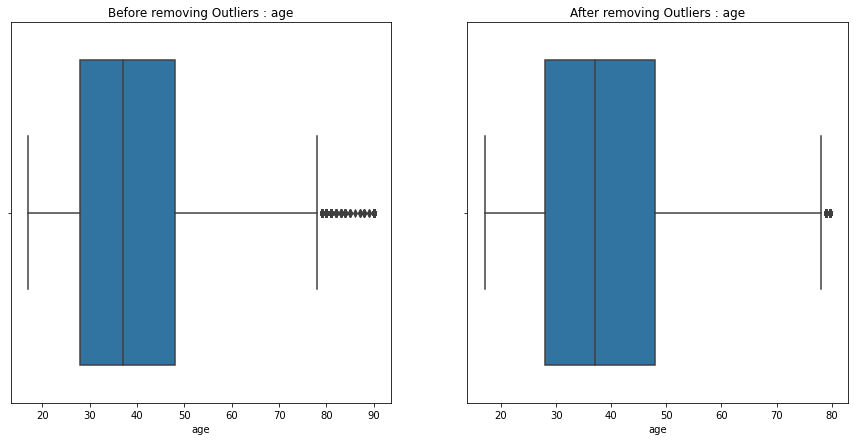

In [188]:
plot_bef_after_outliers('age')

#### Removing Outlier in fnlwgt Column

In [189]:
remove_outliers('fnlwgt',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


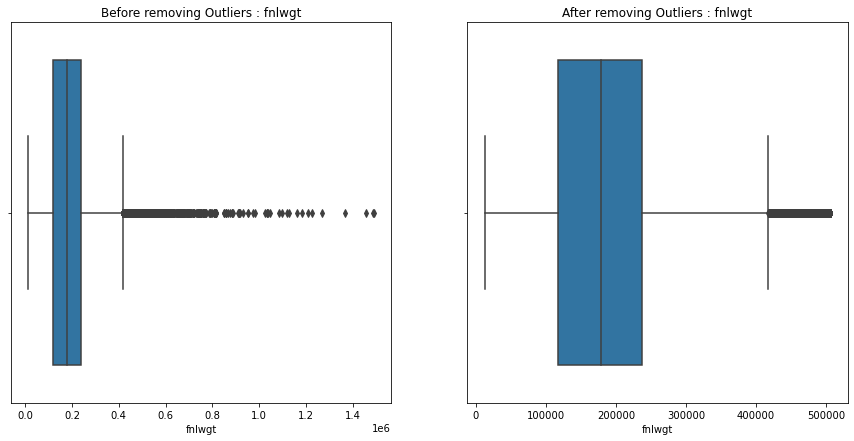

In [190]:
plot_bef_after_outliers('fnlwgt')

In [191]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

#### Removing Outlier in capital-gain Column

In [192]:
remove_outliers('capital-gain',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


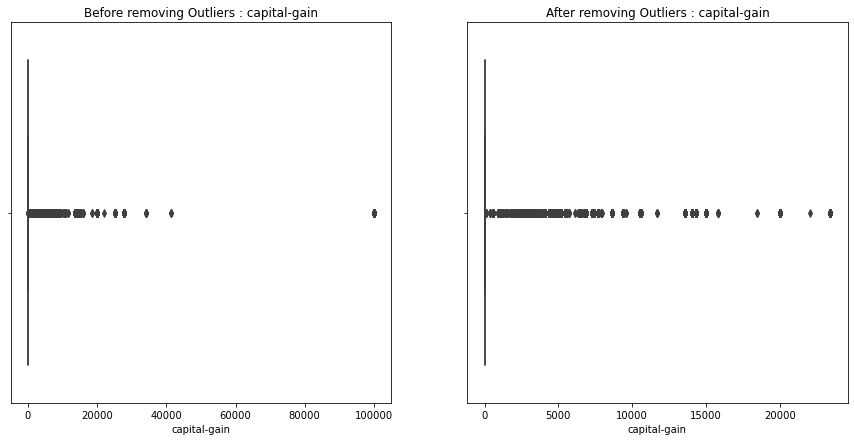

In [193]:
plot_bef_after_outliers('capital-gain')

#### Removing Outlier in capital-loss Column

In [194]:
remove_outliers('capital-loss',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


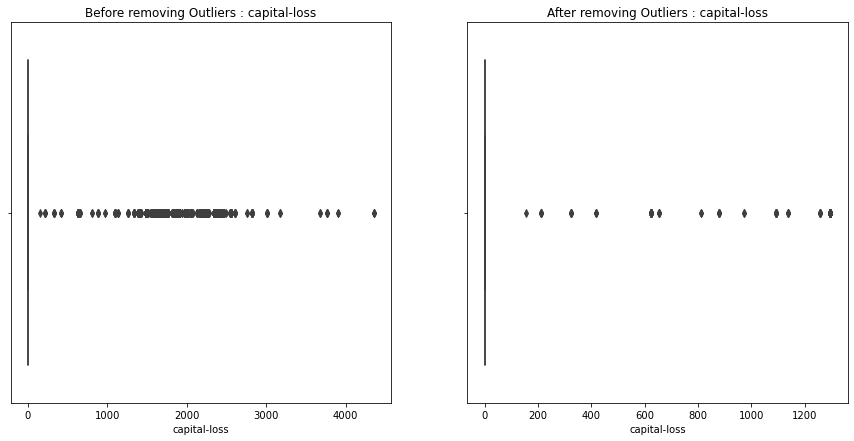

In [195]:
plot_bef_after_outliers('capital-loss')

#### Removing Outlier in hours-per-week Column

In [196]:
remove_outliers('hours-per-week',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower


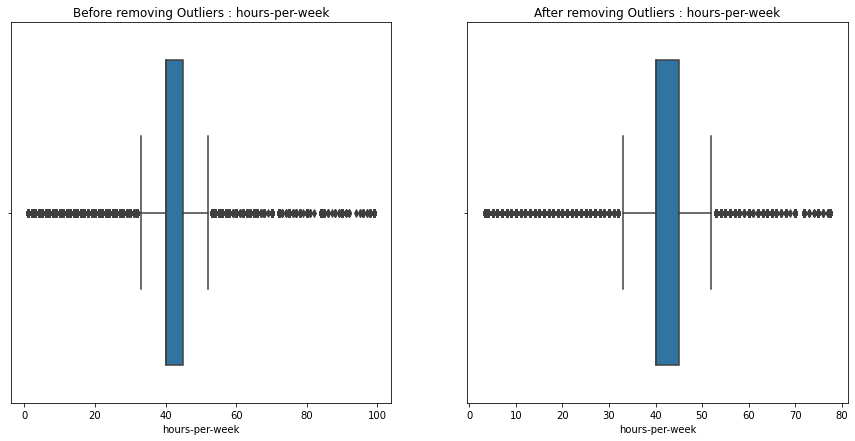

In [197]:
plot_bef_after_outliers('hours-per-week')